#Gold Price Prediction
The aim of this project is to predict the price of gold using the previous price range data of gold. Here, Random Forest Regression Model is used for training the agent.

####importing required libraries

In [1]:
import numpy as np      #Useful for making NumPy arrays
import pandas as pd     #Useful for creating DataFrame

#Following libraries will bi used for plotting graphs
import matplotlib.pyplot as plt
import seaborn as sns

#Following library will help us to split data into training set and testing set
from sklearn.model_selection import train_test_split

#Importing random forest regression model
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics     #For evaluating the performance of the model

###Data Collection and Processing

In [2]:
#Loading the dataset 
gold_data = pd.read_csv ('gld_price_data.csv')

In [3]:
#Printing the first 5 rows
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


Note: 'spx' is also called 'csmp index'. It is the capitalization index of 500 companies which are publicly traded. So, it is one of the stocks that is available.
'gld' represents 'gold price' which will be predicted by the agent implemented in this project.
'uso' represents united states oil price.
'slv' represents silver price.
'eur/usd' represents currency pair. eg:- '1.47' means that 1 euro equals 1.47 usd.

In this project, the machine learning agent will be trained on the stock prices, currency pair, silver price and spx to predict the gold price. Note that there will be no forecasting done by the agent.   

In [4]:
#Printing the last 5 rows
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [5]:
#Number of rows and columns
gold_data.shape

(2290, 6)

In [6]:
#Getting basic information about the data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [7]:
#Checking the number of missing values
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [8]:
#Getting statistical measures of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


###Correlation
There are two types of correlations
1. Positive Correlation:- A positive correlation is a relationship between two variables that tend to move in the same direction. A positive correlation exists when one variable tends to decrease as the other variable decreases, or one variable tends to increase when the other increases.
2. Negative Correlation:- A negative correlation is a relationship between two variables such that as the value of one variable increases, the other decreases.

In [9]:
correlation = gold_data.corr()

<AxesSubplot:>

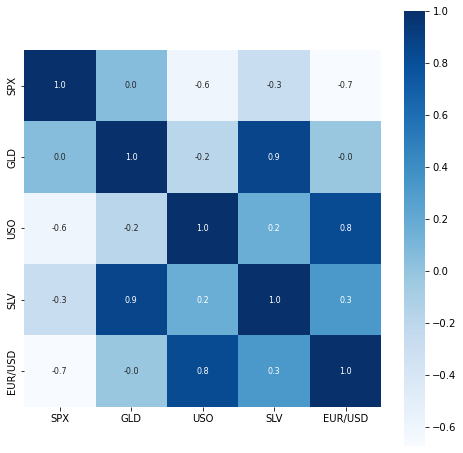

In [10]:
#Constructing a Heat Map for better understanding the correaltion
plt.figure(figsize=(8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

In [11]:
#Correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GLD', ylabel='Density'>

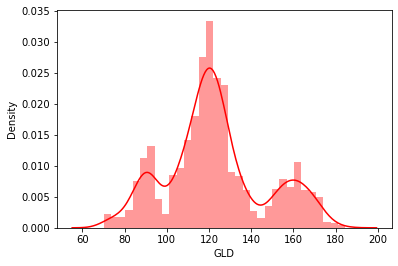

In [12]:
#Checking the distribution of gold price
sns.distplot(gold_data['GLD'], color='red')

###Splitting the Features and Target
Target:- Gold Price
Features:- Other stock prices

In [13]:
X = gold_data.drop(['Date', 'GLD'], axis=1)   #Features
Y = gold_data['GLD']    #Target

In [14]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [15]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


###Splitting into Training Data and Testing Data

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size = 0.2, random_state = 2) 

Model used for Training:
Random Forest Regressor:- A random forest is a meta estimator that fits a number of classifying decision trees on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. 

In [17]:
regressor = RandomForestRegressor(n_estimators=100)

In [18]:
#Training the model
regressor.fit(X_train, Y_train)

RandomForestRegressor()

###Model Evaluation

In [19]:
#Prediction on test data
test_data_prediction = regressor.predict(X_test)

In [20]:
print(test_data_prediction)

[168.62639926  82.29489956 115.84940012 127.58210087 120.8245014
 154.82169753 150.30199883 126.12690069 117.42029881 125.91870103
 116.672801   171.61500075 141.45429859 167.85969886 115.08250042
 117.53630055 138.13820267 170.21610055 159.89050304 157.60759985
 155.05799994 125.18519998 174.91230006 157.28950335 125.18450019
  93.77569999  77.35710021 120.64649983 119.05639902 167.49079982
  88.15800051 125.26200005  91.36830059 117.77450028 121.19679882
 136.13039981 115.580601   115.13890045 148.65139982 107.21410089
 104.71360266  87.18089792 126.53960013 118.07509989 153.47849931
 119.53959987 108.2586     108.13169882  93.2930006  127.03439788
  75.16220015 113.71509932 121.38689989 111.27599901 118.86369882
 120.5886997  159.9433007  167.89190107 146.97549697  86.07069902
  94.39760043  86.70439902  90.51830011 119.00110083 126.44790096
 127.58500024 170.4561996  122.27439941 117.3681991   98.60470011
 168.37960128 143.11519874 132.3144028  121.05240236 120.38969937
 119.802800

In [21]:
#R-Square error metric for evaluation
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R Squared error: ", error_score)

R Squared error:  0.988817602627229


###Comparing actual Value and PRedicted values using a plot

In [22]:
Y_test = list(Y_test)

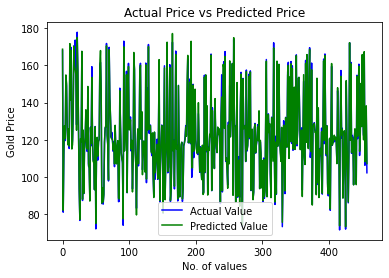

In [23]:
plt.plot(Y_test, color='blue', label='Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('No. of values')
plt.ylabel('Gold Price')
plt.legend()
plt.show()